In [5]:
import numpy as np
import os
import glob
import allantools
import matplotlib.pyplot as plt
from tqdm import tqdm

import counts_statistics_qpe as cs
import phase_estimation_functions as qpe
from densitymatrix import DM

# import numdifftools as nd
# import numpy.linalg as lg
# import scipy.optimize as sp

GHZ

In [51]:
"""
DEFINING FOLDERS AND DIRECTORIES
"""
#data_dir = r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\Long_QPE_no_Certification"
data_dir = r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\Long_QPE_no_Certification"
#data_dir = r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\Phase_stats"
os.chdir(data_dir)
filenames = [i for i in glob.glob("COMPLETE_*")]
n_qubits = 4
final_p_fail_mean = [0.0173, 0.0201, 0.0152, 0.0144, 0.0152, 0.0142]
#final_p_fail_mean = [0.2557,0.2567,0.2585]
input_state = "GHZ" #or GHZ # This will specify in which folder we want to save the figures

In [52]:
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""

#Ordering the files : 
order = ['FIRST', 'SECOND', 'THIRD', 'FOURTH', 'FIFTH', 'SIXTH']

# Fonction pour extraire l’ordre à partir du nom
def sort_key(item):
    for index, keyword in enumerate(order):
        if keyword in item:
            return index
    return len(order)  # En cas d'élément non reconnu, le mettre à la fin

# Tri de la liste
filenames = sorted(filenames, key=sort_key)

stabilizers = ["xxxx"]
stab_sign = [1]
STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}

n_rounds =3000
samples_evolution = np.arange(1, n_rounds+1, 1)
stats_list = []

p_pass = np.zeros((len(filenames), n_rounds))
p_pass_error = np.zeros((len(filenames), n_rounds))

for index, file in enumerate(filenames):
    file_dir = f"{data_dir}\{file}\counts"
    os.chdir(file_dir)
    files=[i for i in glob.glob("Phase*.txt")]
    ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
    files.sort(key = lambda x: int((x.split("_")[1]).split(".")[0]))

    stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, files, file_dir)#, qubit='1',state='Bell',set_loops=1) #Set_loops = 1?
    stats_list.append(stats)

    p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution)
    
    p_pass[index] = np.array(p_pass_list, dtype = float)
    p_pass_error[index] = np.array(stats.p_pass_error_list, dtype = float)
    

p_fail = 1 - p_pass
p_fail_error = p_pass_error

<string>:30: SyntaxWarning: invalid escape sequence '\{'
<>:30: SyntaxWarning: invalid escape sequence '\{'
<>:30: SyntaxWarning: invalid escape sequence '\c'
<string>:30: SyntaxWarning: invalid escape sequence '\{'
<>:30: SyntaxWarning: invalid escape sequence '\{'
<>:30: SyntaxWarning: invalid escape sequence '\c'
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_33268\3513183991.py:30: SyntaxWarning: invalid escape sequence '\{'
  file_dir = f"{data_dir}\{file}\counts"
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_33268\3513183991.py:30: SyntaxWarning: invalid escape sequence '\c'
  file_dir = f"{data_dir}\{file}\counts"


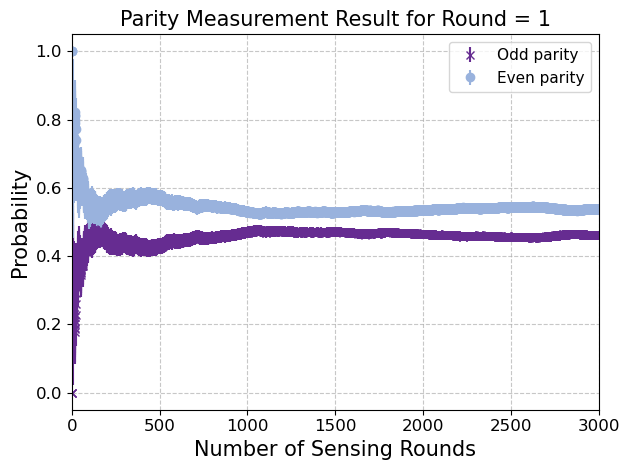

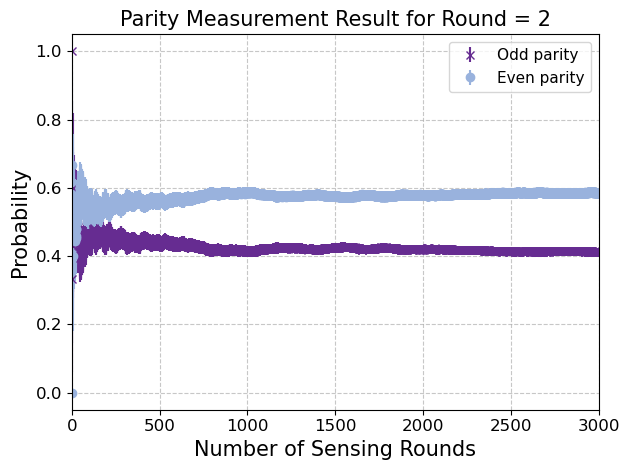

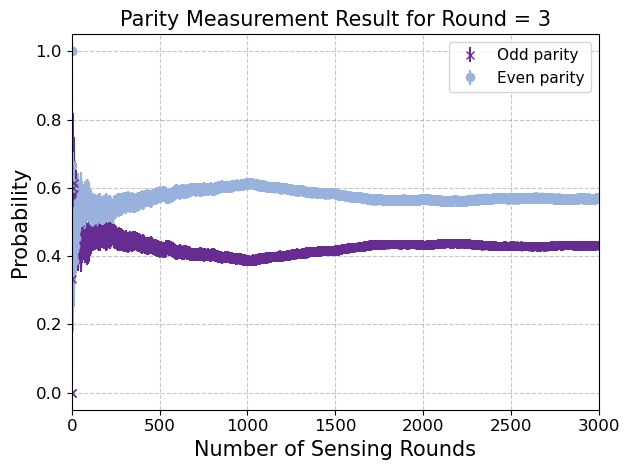

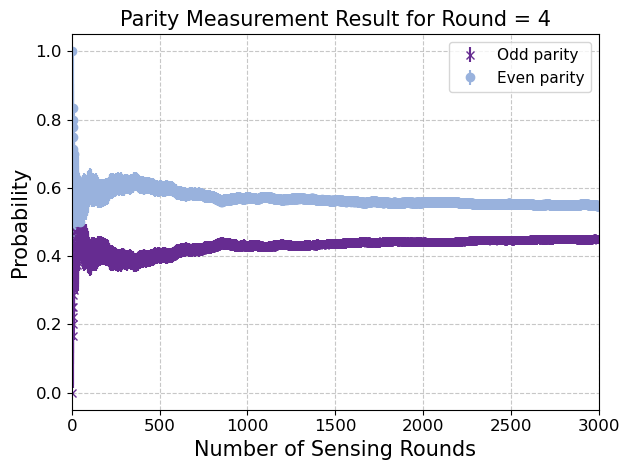

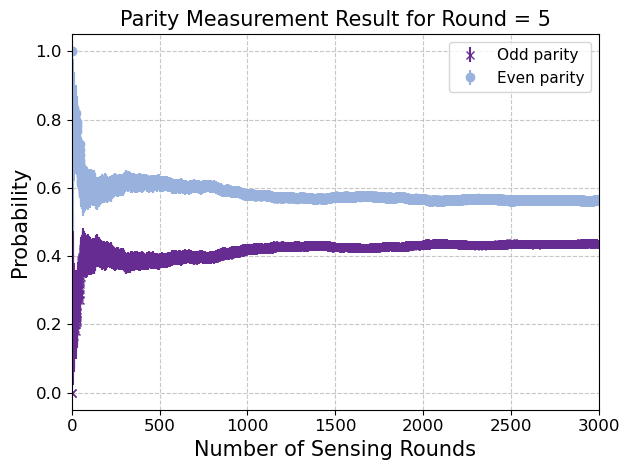

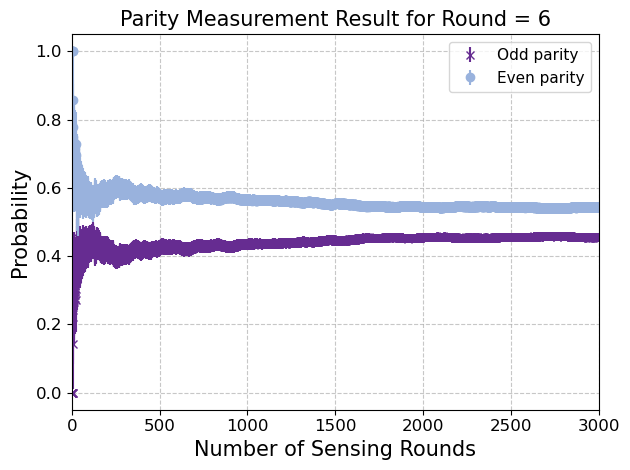

In [53]:
colors = ["#99B2DD","#662C91","#40376E","#E0BE36"]
for index, file in enumerate(filenames):
    plt.errorbar(samples_evolution, p_fail[index], p_fail_error[index], color=colors[1], fmt='x', label = "Odd parity")
    plt.errorbar(samples_evolution, p_pass[index], p_pass_error[index], color=colors[0], fmt='o', label = "Even parity")
    plt.xlabel("Number of Sensing Rounds", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.title(f"Parity Measurement Result for Round = {index+1}", fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, n_rounds)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=11, markerscale=1.)
    plt.tight_layout()
    # plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\Long_QPE_no_Certification\Parity_Measurement_Graph\iixx\Long_sensing_p_evol_r={index+1}.pdf")
    plt.show()

In [6]:
"""
LOADING DATA FOR THE ALLAN DEVIATION
IF THESE FILES WERE NOT GENERATED, YOU CAN USE THE A COMMENTED CELL BELOW TO DO IT
"""
n_configs=6
qtys = ["theta_mle","n_samples"]
theta_mle = {}

for index, file in enumerate(filenames):
    for i in tqdm(range(n_configs)):
        stats_dir = f"{data_dir}\{file}\estimation_stats"
        for qty in qtys:
            with open(f"{stats_dir}\\{qty}.txt", "r") as f:
                # It reads each qtys.txt file and writes its content as variable qtys[i]_list;
                # eg.: p_pass_list and n_samples_list used bellow in the cell are defined here
                var_name = f"{qty}_list"
                locals()[var_name] = list(map(float,list(f.read().strip("[").strip("]").split(","))))
            theta_mle[file] = np.array(theta_mle_list)

<string>:11: SyntaxWarning: invalid escape sequence '\{'
<>:11: SyntaxWarning: invalid escape sequence '\{'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<string>:11: SyntaxWarning: invalid escape sequence '\{'
<>:11: SyntaxWarning: invalid escape sequence '\{'
<>:11: SyntaxWarning: invalid escape sequence '\e'
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_13972\3942546711.py:11: SyntaxWarning: invalid escape sequence '\{'
  stats_dir = f"{data_dir}\{file}\estimation_stats"
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_13972\3942546711.py:11: SyntaxWarning: invalid escape sequence '\e'
  stats_dir = f"{data_dir}\{file}\estimation_stats"
100%|██████████| 6/6 [00:00<00:00, 270.05it/s]


The optimal averaging time 974.6666666666666
List of optimal time [849, 828, 1096, 1123, 969, 983]


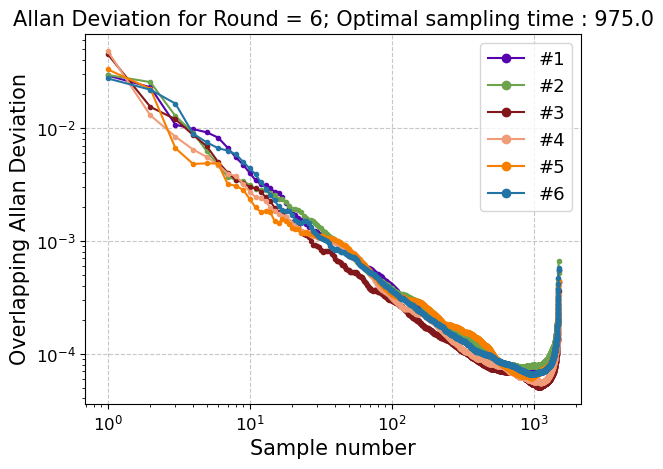

In [23]:
"""
PLOTTING THE ALLAN DEVIATION
"""
def plotallan(plt, y, rate, taus, label, color):
    t2, ad, _, _ = allantools.oadev(y, rate=rate, data_type="phase", taus=taus)
    plt.loglog(t2, ad, color=color, marker=".", label=label)
    return t2, ad

x_min_list = []
colors = ["#5603AD", "#6DA34D", "#81171B", "#F19C79", "#F77F00", "#2274A5"]
taus = np.arange(0, 3001)
for index, file in enumerate(filenames):
    label=f"#{index+1}"
    x_data, y_data = plotallan(plt, np.array(theta_mle[file]), 1, taus , label, color=colors[index])

    y_min = np.min(y_data)
    x_min = list(y_data).index(y_min)
    
    x_min_list.append(x_min)

x_min_average = np.average(np.array(x_min_list))
print(f"The optimal averaging time {x_min_average}")
print(f"List of optimal time {x_min_list}")

plt.xlabel(r'Sample number', fontsize=15)
plt.ylabel('Overlapping Allan Deviation', fontsize=15)
plt.legend(fontsize=13, markerscale=2.)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f"Allan Deviation for Round = {index+1}; Optimal sampling time : {np.round(x_min_average)}", fontsize=15)
# plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\Long_QPE_no_Certification\Allan_Deviation_Graph\Allan_deviation_r={index+1}.pdf")
plt.show()

In [54]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
thetas_mle = {"v": {"sum": {"values": np.zeros(6), "variance": np.zeros(6), "fisher_info": np.zeros(6)},
                    "indiv": {"values": np.zeros((4,6)), "variance": np.zeros((4,6)), "fisher_info": np.zeros((4,6))}},
              "dm": {"sum": {"values": np.zeros(6), "variance": np.zeros(6), "fisher_info": np.zeros(6)},
                    "indiv": {"values": np.zeros((4,6)), "variance": np.zeros((4,6)), "fisher_info": np.zeros((4,6))}}}

#### Function to write params in the dictionary
def set_estimation_params(estimator_class, dic, index, a_vectors_list,lim):
    mle = estimator_class
    estimation_results = mle.get_theta(get_cov = True,set_lim=lim).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance(np.array([1, 1, 1, 1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/lim)
    for i in range(4):
        dic["indiv"]["values"][i][index] = (estimation_results[i])
        dic["indiv"]["variance"][i][index] = np.array(mle.get_variance(a_vectors_list[i]))
        dic["indiv"]["fisher_info"][i][index] = np.array(mle.fisher_bound/lim)
    return dic

### Vector list to extract the estimation of the indifivual params
a_vectors_list = [np.array([1, 0, 0, 0]), np.array([0, 1, 0, 0]), np.array([0, 0, 1, 0]), np.array([0, 0, 0, 1])]

dm_files = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\Long_QPE_no_Certification\Run*")]
density_matrix = {}
QST_file = []

def generate_angles_in_radians(n):

    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        """
        Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
        et dont la somme est exactement égale à π/2.
        """
        target_sum = np.pi / 2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 3))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a2 = angles[1] - angles[0]
        a3 = angles[2] - angles[1]
        a4 = target_sum - angles[2]  # Assurer que la somme soit bien égale à π/2
        x.append([a1, a2, a3, a4])
    return x

# Exemple d'exécution
fisher_info_matrix_GHZ = []
input_state = 'GHZ'
lim = [849, 828, 1096, 1123, 969, 983]
x0 = generate_angles_in_radians(100)
for index, file in enumerate(filenames):
    v = 1 - 2*final_p_fail_mean[index]
    qubit = 4
    
    os.chdir(dm_files[index])
    QST_file.append(glob.glob("QST_*")[0])
    os.chdir(f'{dm_files[index]}\\{QST_file[index]}')
    with open('density.npy','rb') as f:
        density_matrix[f'{QST_file[index]}'] = np.load(f)

    dm = density_matrix[QST_file[index]]
    meas_stats = stats_list[index]
    bnds = ((-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2),(-np.pi/2,np.pi/2))
    ##### Theta estimation and saving params in dictionary #####
    mle[file] = qpe.Estimator(input_state, qubit, meas_stats, x0,bnds, "visibility", (v))
    set_estimation_params(mle[file], thetas_mle["v"], index, a_vectors_list,lim[index])
    mle[file].set_function_type("density_matrix", dm)
    set_estimation_params(mle[file], thetas_mle["dm"], index, a_vectors_list,lim[index])
    fisher_info_matrix_GHZ.append(mle[file].get_cov_matrix())

# print(np.transpose(thetas_mle["v"]["sum"]["values"])*180/np.pi)
# print(np.transpose(thetas_mle["dm"]["sum"]["values"])*180/np.pi)

c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:501: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_ieq = vstack([con['jac'](x, *con['args'])
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)


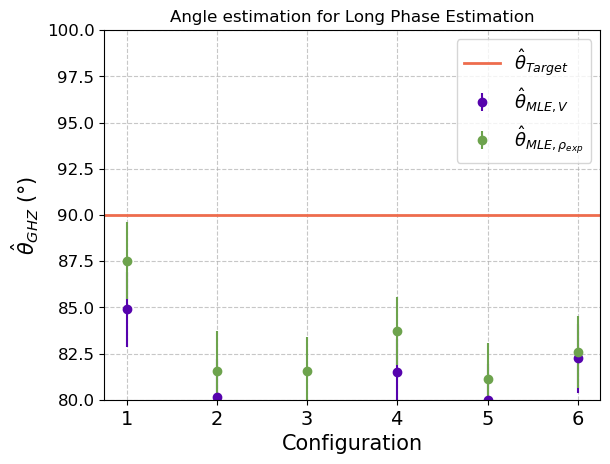

In [57]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3, 4, 5, 6]

plt.figure(figsize=(6.4, 4.8))
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
plt.errorbar(x_data, thetas_mle["v"]["sum"]["values"]*180/np.pi, thetas_mle["v"]["sum"]["variance"]*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{MLE, V}$", marker = 'o', linestyle = "")
plt.errorbar(x_data, thetas_mle["dm"]["sum"]["values"]*180/np.pi, thetas_mle["dm"]["sum"]["variance"]*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{MLE, \rho_{exp}}$", marker = 'o', linestyle = "")

plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$\hat{\theta}_{GHZ}$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.ylim(80, 100)
plt.legend(fontsize=13, markerscale=1.)#, bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\Long_QPE_no_Certification\Angle_Long_Phase_Estimation_GHZ.pdf")
plt.show()

In [30]:
thetas_mle["dm"]["indiv"]["values"]*180/np.pi

array([[ 57.95288824,  23.85016809, -90.        ,  72.57976751,
        -26.47902976,  89.50542891],
       [ 24.65824606,  90.        ,  90.        , -90.        ,
        -72.60764691, -90.        ],
       [  9.66780687, -82.09142613,  69.20390664,  74.19308869,
         89.99999998,   5.96534468],
       [ -4.74905035,  49.8507647 ,  13.16057862,  26.96030373,
         90.        ,  77.11059958]])

BELL

In [17]:
"""
DEINING FOLDERS AND DIRECTORIES
"""
data_dir = r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\long_QPE_no_Certification"
os.chdir(data_dir)
filenames = [i for i in glob.glob("COMPLETE*")]
n_qubits = 4

stabilizers = ["xxxx"]
stab_sign = [1]

final_p_fail_mean_bottom =  [0.0114, 0.0116, 0.0259]
final_p_fail_mean_top = [0.0074, 0.0079, 0.0173]

input_state = "Bell" # or GHZ # This will specify in which folder we want to save the figures

In [18]:
"""
LOADING DATA FOR THE ALLAN DEVIATION
IF THESE FILES WERE NOT GENERATED, YOU CAN USE THE A COMMENTED CELL BELOW TO DO IT
"""
n_configs=6
qtys = ["theta_mle_top","n_samples"]
theta_mle_top = {}

for index, file in enumerate(filenames):
    for i in tqdm(range(n_configs)):
        stats_dir = f"{data_dir}\{file}\estimation_stats"
        for qty in qtys:
            with open(f"{stats_dir}\\{qty}.txt", "r") as f:
                # It reads each qtys.txt file and writes its content as variable qtys[i]_list;
                # eg.: p_pass_list and n_samples_list used bellow in the cell are defined here
                var_name = f"{qty}_list"
                locals()[var_name] = list(map(float,list(f.read().strip("[").strip("]").split(","))))
            theta_mle_top[file] = np.array(theta_mle_top_list)

<string>:11: SyntaxWarning: invalid escape sequence '\{'
<>:11: SyntaxWarning: invalid escape sequence '\{'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<string>:11: SyntaxWarning: invalid escape sequence '\{'
<>:11: SyntaxWarning: invalid escape sequence '\{'
<>:11: SyntaxWarning: invalid escape sequence '\e'
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_33268\2434225048.py:11: SyntaxWarning: invalid escape sequence '\{'
  stats_dir = f"{data_dir}\{file}\estimation_stats"
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_33268\2434225048.py:11: SyntaxWarning: invalid escape sequence '\e'
  stats_dir = f"{data_dir}\{file}\estimation_stats"
100%|██████████| 6/6 [00:00<00:00, 221.22it/s]


In [2]:
"""
LOADING DATA FOR THE ALLAN DEVIATION
IF THESE FILES WERE NOT GENERATED, YOU CAN USE THE A COMMENTED CELL BELOW TO DO IT
"""
n_configs=6
qtys = ["theta_mle_bottom","n_samples"]
theta_mle_bottom = {}

for index, file in enumerate(filenames):
    for i in tqdm(range(n_configs)):
        stats_dir = f"{data_dir}\{file}\estimation_stats"
        for qty in qtys:
            with open(f"{stats_dir}\\{qty}.txt", "r") as f:
                # It reads each qtys.txt file and writes its content as variable qtys[i]_list;
                # eg.: p_pass_list and n_samples_list used bellow in the cell are defined here
                var_name = f"{qty}_list"
                locals()[var_name] = list(map(float,list(f.read().strip("[").strip("]").split(","))))
            theta_mle_bottom[file] = np.array(theta_mle_bottom_list)

<string>:11: SyntaxWarning: invalid escape sequence '\{'
<>:11: SyntaxWarning: invalid escape sequence '\{'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<string>:11: SyntaxWarning: invalid escape sequence '\{'
<>:11: SyntaxWarning: invalid escape sequence '\{'
<>:11: SyntaxWarning: invalid escape sequence '\e'
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_33268\1490754746.py:11: SyntaxWarning: invalid escape sequence '\{'
  stats_dir = f"{data_dir}\{file}\estimation_stats"
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_33268\1490754746.py:11: SyntaxWarning: invalid escape sequence '\e'
  stats_dir = f"{data_dir}\{file}\estimation_stats"
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_33268\1490754746.py:11: SyntaxWarning: invalid escape sequence '\{'
  stats_dir = f"{data_dir}\{file}\estimation_stats"
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_33268\1490754746.py:11: SyntaxWarning: invalid escape sequence '\e'
  stats_dir = f"{data_dir}\{file}\estimation_stats"
<string>:11: SyntaxWar

NameError: name 'filenames' is not defined

In [1]:
"""
PLOTTING THE ALLAN DEVIATION
"""
def plotallan(plt, y, rate, taus, label, color):
    t2, ad, _, _ = allantools.oadev(y, rate=rate, data_type="phase", taus=taus)
    plt.loglog(t2, ad, color=color, marker=".", label=label)
    return t2, ad

x_min_list = []
colors = ["#5603AD", "#6DA34D", "#81171B", "#F19C79", "#F77F00", "#2274A5"]
taus = np.arange(0, 3001)
for index, file in enumerate(filenames):
    label=f"#{index+1}"
    x_data, y_data = plotallan(plt, np.array(theta_mle_top[file]), 1, taus , label, color=colors[index])

    y_min = np.min(y_data)
    x_min = list(y_data).index(y_min)
    
    x_min_list.append(x_min)

    x_min_average = np.average(np.array(x_min_list))
    print(f"The optimal averaging time {x_min_average}")
    print(f"List of optimal time {x_min_list}")

plt.xlabel(r'Sample number', fontsize=15)
plt.ylabel('Overlapping Allan Deviation', fontsize=15)
plt.legend(fontsize=13, markerscale=2.)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f"Allan Deviation for Round = {index+1} Optimal sample : {x_min_list[index]}", fontsize=15)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\Long_QPE_no_Certification\Allan_Deviation_Graph\Allan_deviation_r={index+1}_Bottom")

plt.show()

NameError: name 'np' is not defined

The optimal averaging time 1115.0
List of optimal time [1115]
The optimal averaging time 1267.0
List of optimal time [1115, 1419]
The optimal averaging time 1185.0
List of optimal time [1115, 1419, 1021]


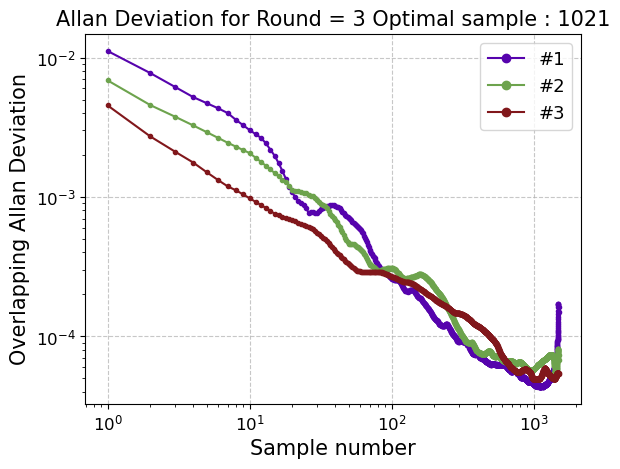

In [26]:
"""
PLOTTING THE ALLAN DEVIATION
"""
def plotallan(plt, y, rate, taus, label, color):
    t2, ad, _, _ = allantools.oadev(y, rate=rate, data_type="phase", taus=taus)
    plt.loglog(t2, ad, color=color, marker=".", label=label)
    return t2, ad

x_min_list = []
colors = ["#5603AD", "#6DA34D", "#81171B", "#F19C79", "#F77F00", "#2274A5"]
taus = np.arange(0, 3001)
for index, file in enumerate(filenames):
    label=f"#{index+1}"
    x_data, y_data = plotallan(plt, np.array(theta_mle_bottom[file]), 1, taus , label, color=colors[index])

    y_min = np.min(y_data)
    x_min = list(y_data).index(y_min)
    
    x_min_list.append(x_min)

    x_min_average = np.average(np.array(x_min_list))
    print(f"The optimal averaging time {x_min_average}")
    print(f"List of optimal time {x_min_list}")

plt.xlabel(r'Sample number', fontsize=15)
plt.ylabel('Overlapping Allan Deviation', fontsize=15)
plt.legend(fontsize=13, markerscale=2.)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f"Allan Deviation for Round = {index+1} Optimal sample : {x_min_list[index]}", fontsize=15)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\Long_QPE_no_Certification\Allan_Deviation_Graph\Allan_deviation_r={index+1}_Bottom")

plt.show()

In [19]:
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""
n_rounds = 3000
samples_evolution = np.arange(1, n_rounds+1, 1)
stats_list = {"file_1":{}, "file_2":{}, "file_3":{}}

p_pass = np.zeros((2, len(filenames), n_rounds))
p_pass_error = np.zeros((2, len(filenames), n_rounds))

for index, file in enumerate(filenames):    
    # pair = 0 refers to top pair and pair = 1 refers to bottom pair
    for pair in range(2):
        STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}
        file_dir = f"{data_dir}\{file}\counts"
        os.chdir(file_dir)

        files = [i for i in glob.glob("Phase*.txt")]
        ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
        files.sort(key = lambda x: int((x.split("_")[2]).split(".")[0]))

        stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, files, file_dir, input_state, str(pair)) #Set_loops = 1?
        stats_list[f"file_{index+1}"][pair] = stats

        p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution)
        
        p_pass[pair][index] = np.array(p_pass_list, dtype = float)
        p_pass_error[pair][index] = np.array(stats.p_pass_error_list, dtype = float)
    
p_fail = 1 - p_pass
p_fail_error = p_pass_error

<string>:15: SyntaxWarning: invalid escape sequence '\{'
<>:15: SyntaxWarning: invalid escape sequence '\{'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<string>:15: SyntaxWarning: invalid escape sequence '\{'
<>:15: SyntaxWarning: invalid escape sequence '\{'
<>:15: SyntaxWarning: invalid escape sequence '\c'
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_33268\2794985445.py:15: SyntaxWarning: invalid escape sequence '\{'
  file_dir = f"{data_dir}\{file}\counts"
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_33268\2794985445.py:15: SyntaxWarning: invalid escape sequence '\c'
  file_dir = f"{data_dir}\{file}\counts"


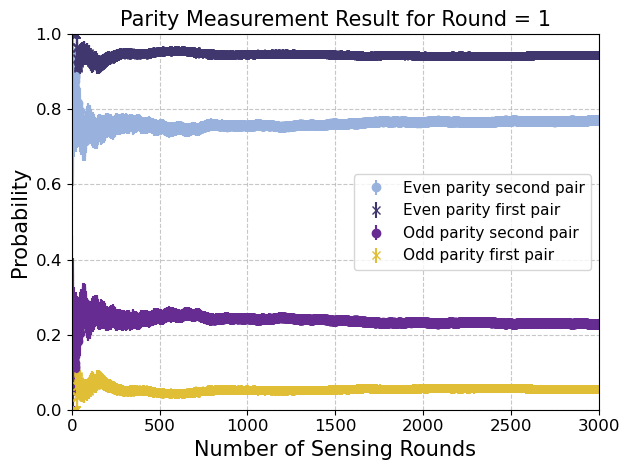

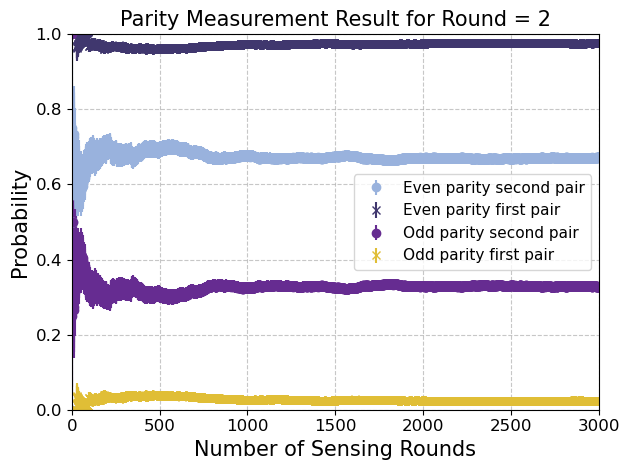

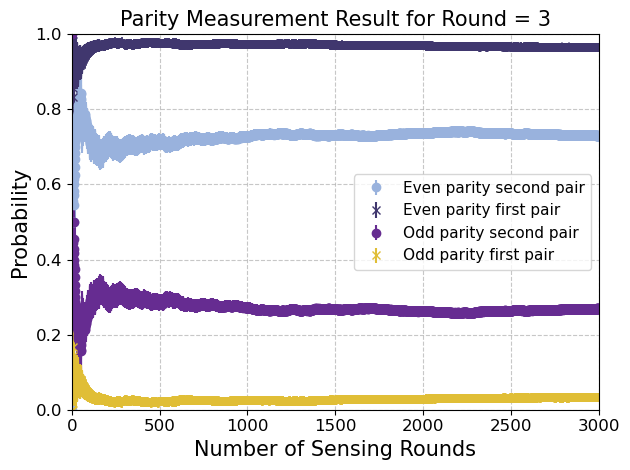

In [20]:
colors = ["#99B2DD","#662C91","#40376E","#E0BE36"]
for index, file in enumerate(filenames):
    plt.errorbar(samples_evolution, p_pass[0][index], p_pass_error[0][index], color=colors[0], fmt='o', label = "Even parity second pair")
    plt.errorbar(samples_evolution, p_pass[1][index], p_pass_error[1][index], color=colors[2], fmt='x', label = "Even parity first pair")
    plt.errorbar(samples_evolution, p_fail[0][index], p_fail_error[0][index], color=colors[1], fmt='o', label = "Odd parity second pair")
    plt.errorbar(samples_evolution, p_fail[1][index], p_fail_error[1][index], color=colors[3], fmt='x', label = "Odd parity first pair")
    plt.xlabel("Number of Sensing Rounds", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.title(f"Parity Measurement Result for Round = {index+1}", fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0,1)
    plt.xlim(0,3000)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=11, markerscale=1.)
    plt.tight_layout()
    # plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\Long_QPE_no_Certification\Parity_Measurement_Graph\iixx\Long_sensing_p_evol_r={index+1}.pdf")
    plt.show()

In [21]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
thetas_mle_bell1 = {0 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                            "indiv": {"values": np.zeros((2,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((2,3))}},
                    "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                            "indiv": {"values": np.zeros((2,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((2,3))}}},
            1 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                        "indiv": {"values": np.zeros((2,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((2,3))}},
                "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                        "indiv": {"values": np.zeros((2,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((2,3))}}}}

def generate_angles_in_radians(n):
    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        target_sum = np.pi / 2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 1))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a2 = target_sum - angles[0]  # Assurer que la somme soit bien égale à π/2

        x.append([a1, a2])
    return x

def set_estimation_params(estimator_class, dic, index, a_vectors_list,lim):
    mle = estimator_class
    estimation_results = mle.get_theta(get_cov = True, set_lim = lim).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance2(np.array([1, 1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/lim)
    for i in range(2):
        dic["indiv"]["values"][i][index] = (estimation_results[i])
        dic["indiv"]["variance"][i][index] = np.array(mle.get_variance2(a_vectors_list[i]))
        dic["indiv"]["fisher_info"][i][index] = np.array(mle.fisher_bound/lim)
    return dic

### Vector list to extract the estimation of the indifivual params
a_vectors_list = [np.array([1, 0]), np.array([0, 1])]
bnds = ((-np.pi/2, np.pi/2), (-np.pi/2, np.pi/2))
x0 = generate_angles_in_radians(20)
fisher_info_matrix = []
### Loading the density matrices
dm_folder = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\QST\Long_QPE_no_Certification\Run*")]
QST_file = []
for index, file in enumerate(dm_folder):
    os.chdir(file)
    QST_file.append(glob.glob("QST_*")[0])

density_matrix = {k: {} for k in QST_file}
for index, file in enumerate(dm_folder):
    os.chdir(f'{file}\\{QST_file[index]}')
    with open('density_TOP.npy','rb') as f:
        density_matrix[str(QST_file[index])][0] = np.load(f)
    with open('density_BOTTOM.npy','rb') as g:
        density_matrix[str(QST_file[index])][1] = np.load(g)

# density_matrix_list = []
# for index, file in enumerate(dm_folder):
#     density_matrix = []
#     os.chdir(f'{file}\\{QST_file[index]}')
#     with open('density_TOP.npy','rb') as f:
#         density_matrix.append(np.load(f))
#     with open('density_BOTTOM.npy','rb') as g:
#         density_matrix.append(np.load(g))

#     density_matrix_list.append(density_matrix)
    
fisher_info_matrix_bell = []
for index, file in enumerate(filenames):
    v = np.array([1 - 2*final_p_fail_mean_top[index], 1 - 2*final_p_fail_mean_bottom[index]])
    lim = [[1050, 1064, 992],[3001, 3001, 3001]]
    for i in range(2):
        dm = density_matrix[str(QST_file[index])][i]
        meas_stats = stats_list[f"file_{index+1}"][i]

        ##### Theta estimation and saving params in dictionary #####
        mle[file] = qpe.Estimator(input_state, i, meas_stats, x0, bnds, "visibility", v[i])
        set_estimation_params(mle[file], thetas_mle_bell1[i]["v"], index, a_vectors_list,lim[i][index])
        mle[file].set_function_type("density_matrix", dm)
        set_estimation_params(mle[file], thetas_mle_bell1[i]["dm"], index, a_vectors_list,lim[i][index])
        fisher_info_matrix_bell.append(mle[file].get_cov_matrix())


c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\QILIP6\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


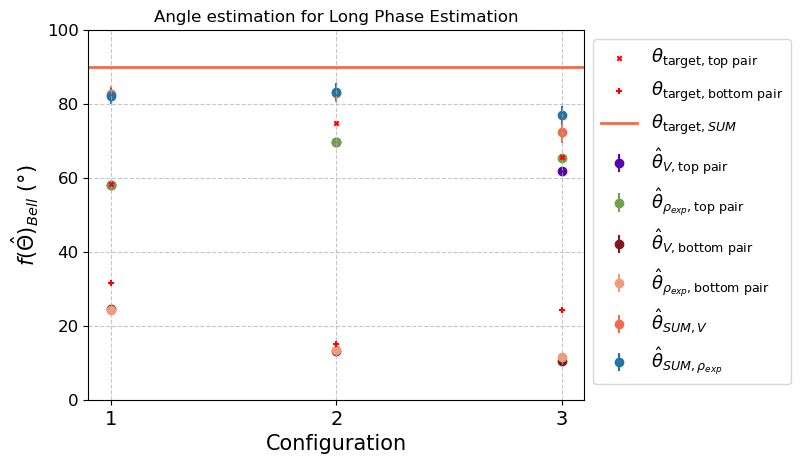

In [23]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

target_angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],
                 'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
                 'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.03116659378]}

target_sums = {"top": [sum(target_angles['RUN_1'][:2])*180/np.pi,
                        sum(target_angles['RUN_2'][:2])*180/np.pi,
                        sum(target_angles['RUN_3'][:2])*180/np.pi],
               "bottom": [sum(target_angles['RUN_1'][-2:])*180/np.pi,
                        sum(target_angles['RUN_2'][-2:])*180/np.pi,
                        sum(target_angles['RUN_3'][-2:])*180/np.pi], 
                "total" :[sum(target_angles['RUN_1'])*180/np.pi,
                        sum(target_angles['RUN_2'])*180/np.pi,
                        sum(target_angles['RUN_3'])*180/np.pi]}

plt.figure(figsize=(6.4, 4.8))
plt.errorbar(x_data, thetas_mle_bell1[0]["v"]["sum"]["values"]*180/np.pi,thetas_mle_bell1[0]["v"]["sum"]["variance"]*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{V,\text{top pair}}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_bell1[0]["dm"]["sum"]["values"]*180/np.pi,thetas_mle_bell1[0]["dm"]["sum"]["variance"]*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{\rho_{exp},\text{top pair}}$", marker = 'o', linestyle = "",zorder=1)
plt.scatter(x_data, target_sums["top"], color='red', s=10, marker="x",label=r"$\theta_{\text{target},\text{top pair}}$",zorder=2)

plt.errorbar(x_data, thetas_mle_bell1[1]["v"]["sum"]["values"]*180/np.pi,thetas_mle_bell1[1]["v"]["sum"]["variance"]*180/np.pi, color=colors[3], label = r"$\hat{\theta}_{V,\text{bottom pair}}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_bell1[1]["dm"]["sum"]["values"]*180/np.pi,thetas_mle_bell1[1]["dm"]["sum"]["variance"]*180/np.pi, color=colors[4], label = r"$\hat{\theta}_{\rho_{exp},\text{bottom pair}}$", marker = 'o', linestyle = "",zorder=1)
plt.scatter(x_data, target_sums["bottom"], color='red', s=20, marker="+",label=r"$\theta_{\text{target},\text{bottom pair}}$",zorder=2)

plt.errorbar(x_data, (thetas_mle_bell1[1]["v"]["sum"]["values"]+thetas_mle_bell1[0]["v"]["sum"]["values"])*180/np.pi,(np.sqrt(thetas_mle_bell1[1]["v"]["sum"]["variance"]+thetas_mle_bell1[0]["v"]["sum"]["variance"]))*180/np.pi, color=colors[0], label = r"$\hat{\theta}_{SUM,V}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, (thetas_mle_bell1[1]["dm"]["sum"]["values"]+thetas_mle_bell1[0]["dm"]["sum"]["values"])*180/np.pi,(np.sqrt(thetas_mle_bell1[1]["dm"]["sum"]["variance"]+thetas_mle_bell1[0]["dm"]["sum"]["variance"]))*180/np.pi, color=colors[5], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\theta_{\text{target}, SUM}$", linewidth=2)


plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta})_{Bell}$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(x_data,fontsize=14)
plt.ylim(0,100)
plt.legend(fontsize=13, markerscale=1.,loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\Long_QPE_no_Certification\Angle_Long_Phase_Estimation_Bell", bbox_inches='tight')
plt.show()

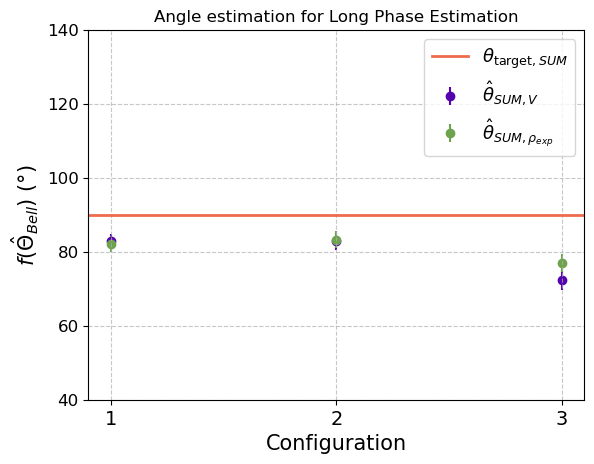

In [24]:
plt.errorbar(x_data, (thetas_mle_bell1[1]["v"]["sum"]["values"]+thetas_mle_bell1[0]["v"]["sum"]["values"])*180/np.pi,(np.sqrt(thetas_mle_bell1[1]["v"]["sum"]["variance"]+thetas_mle_bell1[0]["v"]["sum"]["variance"]))*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{SUM,V}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, (thetas_mle_bell1[1]["dm"]["sum"]["values"]+thetas_mle_bell1[0]["dm"]["sum"]["values"])*180/np.pi,(np.sqrt(thetas_mle_bell1[1]["dm"]["sum"]["variance"]+thetas_mle_bell1[0]["dm"]["sum"]["variance"]))*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\theta_{\text{target}, SUM}$", linewidth=2)


plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta}_{Bell})$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(x_data,fontsize=14)
plt.ylim(40,140)
plt.legend(fontsize=13, markerscale=1.)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\Long_QPE_no_Certification\Angle_Long_Phase_Estimation_Bell.pdf")
plt.show()

PLUS

In [35]:
"""
DEINING FOLDERS AND DIRECTORIES
"""
data_dir = r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\long_QPE_no_Certification"
filenames = [i for i in glob.glob("COMPLETE*")]
os.chdir(data_dir)
n_qubits = 4

stabilizers = ["xxxx"]
stab_sign = [1]

In [36]:
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""
n_rounds = 3000
samples_evolution = np.arange(1, n_rounds+1, 1)
stats_list = {"file_1":{}, "file_2":{}, "file_3":{}}
input_state = 'Plus'
p_pass = np.zeros((4, len(filenames), n_rounds))
p_pass_error = np.zeros((4, len(filenames), n_rounds))

for index, file in enumerate(filenames):    
    # pair = 0 refers to top pair and pair = 1 refers to bottom pair
    for pair in range(4):
        STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}
        file_dir = f"{data_dir}\{file}\counts"
        os.chdir(file_dir)

        files = [i for i in glob.glob("Phase*.txt")]
        ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
        files.sort(key = lambda x: int((x.split("_")[2]).split(".")[0]))

        stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, files, file_dir, input_state, str(pair)) #Set_loops = 1?
        stats_list[f"file_{index+1}"][pair] = stats

        p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution)
        
        p_pass[pair][index] = np.array(p_pass_list, dtype = float)
        p_pass_error[pair][index] = np.array(stats.p_pass_error_list, dtype = float)
    
p_fail = 1 - p_pass
p_fail_error = p_pass_error

<string>:15: SyntaxWarning: invalid escape sequence '\{'
<>:15: SyntaxWarning: invalid escape sequence '\{'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<string>:15: SyntaxWarning: invalid escape sequence '\{'
<>:15: SyntaxWarning: invalid escape sequence '\{'
<>:15: SyntaxWarning: invalid escape sequence '\c'
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_33268\3488278105.py:15: SyntaxWarning: invalid escape sequence '\{'
  file_dir = f"{data_dir}\{file}\counts"
C:\Users\QILIP6\AppData\Local\Temp\ipykernel_33268\3488278105.py:15: SyntaxWarning: invalid escape sequence '\c'
  file_dir = f"{data_dir}\{file}\counts"


In [12]:
"""
LOADING DATA FOR THE ALLAN DEVIATION
IF THESE FILES WERE NOT GENERATED, YOU CAN USE THE A COMMENTED CELL BELOW TO DO IT
"""
n_configs=6

theta_mle_qubit_0 = {}
theta_mle_qubit_1 = {}
theta_mle_qubit_2 = {}
theta_mle_qubit_3 = {}

qtys = ["theta_mle_qubit_0","n_samples"]

for index, file in enumerate(filenames):
    for i in tqdm(range(n_configs)):
        stats_dir = f"{data_dir}\{file}\estimation_stats"
        for qty in qtys:
            with open(f"{stats_dir}\\{qty}.txt", "r") as f:
                # It reads each qtys.txt file and writes its content as variable qtys[i]_list;
                # eg.: p_pass_list and n_samples_list used bellow in the cell are defined here
                var_name = f"{qty}_list"
                locals()[var_name] = list(map(float,list(f.read().strip("[").strip("]").split(","))))
            theta_mle_qubit_0[file] = np.array(theta_mle_qubit_0_list)

qtys = ["theta_mle_qubit_1","n_samples"]

for index, file in enumerate(filenames):
    for i in tqdm(range(n_configs)):
        stats_dir = f"{data_dir}\{file}\estimation_stats"
        for qty in qtys:
            with open(f"{stats_dir}\\{qty}.txt", "r") as f:
                # It reads each qtys.txt file and writes its content as variable qtys[i]_list;
                # eg.: p_pass_list and n_samples_list used bellow in the cell are defined here
                var_name = f"{qty}_list"
                locals()[var_name] = list(map(float,list(f.read().strip("[").strip("]").split(","))))
            theta_mle_qubit_1[file] = np.array(theta_mle_qubit_1_list)

qtys = ["theta_mle_qubit_2","n_samples"]

for index, file in enumerate(filenames):
    for i in tqdm(range(n_configs)):
        stats_dir = f"{data_dir}\{file}\estimation_stats"
        for qty in qtys:
            with open(f"{stats_dir}\\{qty}.txt", "r") as f:
                # It reads each qtys.txt file and writes its content as variable qtys[i]_list;
                # eg.: p_pass_list and n_samples_list used bellow in the cell are defined here
                var_name = f"{qty}_list"
                locals()[var_name] = list(map(float,list(f.read().strip("[").strip("]").split(","))))
            theta_mle_qubit_2[file] = np.array(theta_mle_qubit_2_list)

qtys = ["theta_mle_qubit_3","n_samples"]

for index, file in enumerate(filenames):
    for i in tqdm(range(n_configs)):
        stats_dir = f"{data_dir}\{file}\estimation_stats"
        for qty in qtys:
            with open(f"{stats_dir}\\{qty}.txt", "r") as f:
                # It reads each qtys.txt file and writes its content as variable qtys[i]_list;
                # eg.: p_pass_list and n_samples_list used bellow in the cell are defined here
                var_name = f"{qty}_list"
                locals()[var_name] = list(map(float,list(f.read().strip("[").strip("]").split(","))))
            theta_mle_qubit_3[file] = np.array(theta_mle_qubit_3_list)

<string>:16: SyntaxWarning: invalid escape sequence '\{'
<string>:29: SyntaxWarning: invalid escape sequence '\{'
<string>:42: SyntaxWarning: invalid escape sequence '\{'
<string>:55: SyntaxWarning: invalid escape sequence '\{'
<>:16: SyntaxWarning: invalid escape sequence '\{'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:29: SyntaxWarning: invalid escape sequence '\{'
<>:29: SyntaxWarning: invalid escape sequence '\e'
<>:42: SyntaxWarning: invalid escape sequence '\{'
<>:42: SyntaxWarning: invalid escape sequence '\e'
<>:55: SyntaxWarning: invalid escape sequence '\{'
<>:55: SyntaxWarning: invalid escape sequence '\e'
<string>:16: SyntaxWarning: invalid escape sequence '\{'
<string>:29: SyntaxWarning: invalid escape sequence '\{'
<string>:42: SyntaxWarning: invalid escape sequence '\{'
<string>:55: SyntaxWarning: invalid escape sequence '\{'
<>:16: SyntaxWarning: invalid escape sequence '\{'
<>:16: SyntaxWarning: invalid escape sequence '\e'
<>:29: SyntaxWarning: invalid esca

The optimal averaging time 957.0
List of optimal time [957]
The optimal averaging time 1191.5
List of optimal time [957, 1426]
The optimal averaging time 1282.0
List of optimal time [957, 1426, 1463]


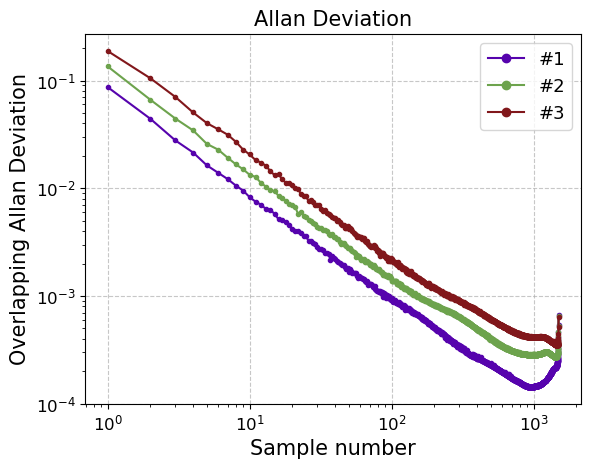

The optimal averaging time 1076.0
List of optimal time [1076]
The optimal averaging time 998.0
List of optimal time [1076, 920]
The optimal averaging time 1149.6666666666667
List of optimal time [1076, 920, 1453]


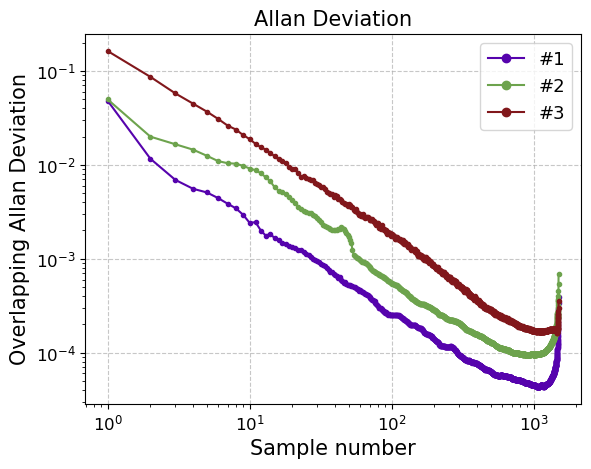

The optimal averaging time 1087.0
List of optimal time [1087]
The optimal averaging time 1059.0
List of optimal time [1087, 1031]
The optimal averaging time 983.3333333333334
List of optimal time [1087, 1031, 832]


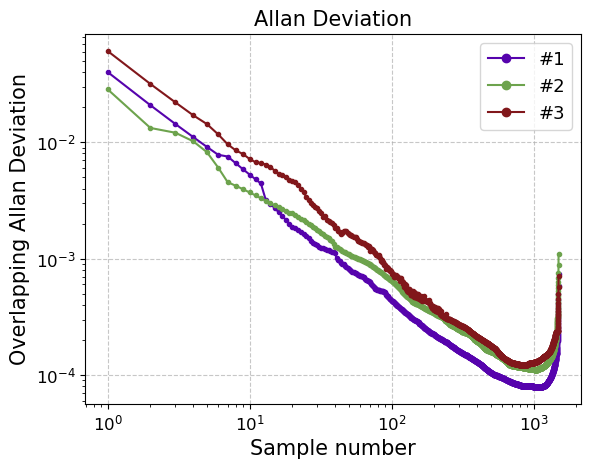

The optimal averaging time 1079.0
List of optimal time [1079]
The optimal averaging time 1221.0
List of optimal time [1079, 1363]
The optimal averaging time 1263.3333333333333
List of optimal time [1079, 1363, 1348]


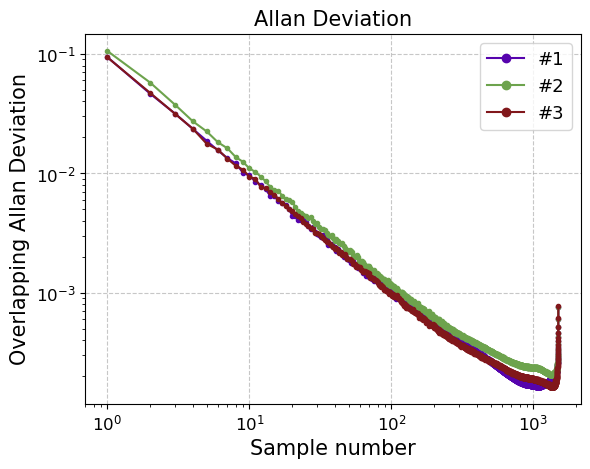

In [13]:
"""
PLOTTING THE ALLAN DEVIATION
"""
def plotallan(plt, y, rate, taus, label, color):
    t2, ad, _, _ = allantools.oadev(y, rate=rate, data_type="phase", taus=taus)
    plt.loglog(t2, ad, color=color, marker=".", label=label)
    return t2, ad

x_min_list = []
colors = ["#5603AD", "#6DA34D", "#81171B", "#F19C79", "#F77F00", "#2274A5"]
taus = np.arange(0, 3001)
for index, file in enumerate(filenames):
    label=f"#{index+1}"
    x_data, y_data = plotallan(plt, np.array(theta_mle_qubit_0[file]), 1, taus , label, color=colors[index])

    y_min = np.min(y_data)
    x_min = list(y_data).index(y_min)
    
    x_min_list.append(x_min)

    x_min_average = np.average(np.array(x_min_list))
    print(f"The optimal averaging time {x_min_average}")
    print(f"List of optimal time {x_min_list}")

plt.xlabel(r'Sample number', fontsize=15)
plt.ylabel('Overlapping Allan Deviation', fontsize=15)
plt.legend(fontsize=13, markerscale=2.)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f"Allan Deviation", fontsize=15)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\Long_QPE_no_Certification\Allan_Deviation_Graph\Allan_deviation_r={index+1}_Bottom")

plt.show()

x_min_list = []
colors = ["#5603AD", "#6DA34D", "#81171B", "#F19C79", "#F77F00", "#2274A5"]
taus = np.arange(0, 3001)
for index, file in enumerate(filenames):
    label=f"#{index+1}"
    x_data, y_data = plotallan(plt, np.array(theta_mle_qubit_1[file]), 1, taus , label, color=colors[index])

    y_min = np.min(y_data)
    x_min = list(y_data).index(y_min)
    
    x_min_list.append(x_min)

    x_min_average = np.average(np.array(x_min_list))
    print(f"The optimal averaging time {x_min_average}")
    print(f"List of optimal time {x_min_list}")

plt.xlabel(r'Sample number', fontsize=15)
plt.ylabel('Overlapping Allan Deviation', fontsize=15)
plt.legend(fontsize=13, markerscale=2.)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f"Allan Deviation", fontsize=15)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\Long_QPE_no_Certification\Allan_Deviation_Graph\Allan_deviation_r={index+1}_Bottom")

plt.show()

x_min_list = []
colors = ["#5603AD", "#6DA34D", "#81171B", "#F19C79", "#F77F00", "#2274A5"]
taus = np.arange(0, 3001)
for index, file in enumerate(filenames):
    label=f"#{index+1}"
    x_data, y_data = plotallan(plt, np.array(theta_mle_qubit_2[file]), 1, taus , label, color=colors[index])

    y_min = np.min(y_data)
    x_min = list(y_data).index(y_min)
    
    x_min_list.append(x_min)

    x_min_average = np.average(np.array(x_min_list))
    print(f"The optimal averaging time {x_min_average}")
    print(f"List of optimal time {x_min_list}")

plt.xlabel(r'Sample number', fontsize=15)
plt.ylabel('Overlapping Allan Deviation', fontsize=15)
plt.legend(fontsize=13, markerscale=2.)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f"Allan Deviation", fontsize=15)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\Long_QPE_no_Certification\Allan_Deviation_Graph\Allan_deviation_r={index+1}_Bottom")

plt.show()

x_min_list = []
colors = ["#5603AD", "#6DA34D", "#81171B", "#F19C79", "#F77F00", "#2274A5"]
taus = np.arange(0, 3001)
for index, file in enumerate(filenames):
    label=f"#{index+1}"
    x_data, y_data = plotallan(plt, np.array(theta_mle_qubit_3[file]), 1, taus , label, color=colors[index])

    y_min = np.min(y_data)
    x_min = list(y_data).index(y_min)
    
    x_min_list.append(x_min)

    x_min_average = np.average(np.array(x_min_list))
    print(f"The optimal averaging time {x_min_average}")
    print(f"List of optimal time {x_min_list}")

plt.xlabel(r'Sample number', fontsize=15)
plt.ylabel('Overlapping Allan Deviation', fontsize=15)
plt.legend(fontsize=13, markerscale=2.)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f"Allan Deviation", fontsize=15)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\Long_QPE_no_Certification\Allan_Deviation_Graph\Allan_deviation_r={index+1}_Bottom")

plt.show()

In [37]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
fail_mean = [[0.0019, 0.0176, 0.031],[0.0016, 0.0039, 0.0019],[0.0005, 0.0008, 0.0012],[0.0066, 0.0228, 0.0191]]
thetas_mle_plus = {0 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}},
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}}},
            1 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}},
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}}},
            2 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}},
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}}},
            3 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}},
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}}}}

def generate_angles_in_radians(n):
    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        target_sum = np.pi/2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 1))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a4 = target_sum - angles[0]  # Assurer que la somme soit bien égale à π/2

        x.append(a1)

    return x

def set_estimation_params(estimator_class, dic, index, a_vectors_list,lim):
    mle = estimator_class
    estimation_results = mle.get_theta(get_cov = True, set_lim = lim).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance2(np.array([1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/lim)

### Vector list to extract the estimation of the indifivual params
a_vectors_list = np.array([1])

x0 = generate_angles_in_radians(100)

plus = (np.array([1,0])+np.array([0,1]))/np.sqrt(2)
plusmatrix = np.array(np.outer(plus, np.conjugate(plus)))
fisher_info_matrix_plus = []
dm_folder = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\QST\LONG\Run*")]
QST_file = []
for index, file in enumerate(dm_folder):
    os.chdir(file)
    QST_file.append(glob.glob("QST_*")[0])
density_matrix = {k:{} for k in QST_file}
for index, file in enumerate(dm_folder):
    os.chdir(f'{file}\\{QST_file[index]}')
    with open('density_TOP.npy','rb') as f:
        density_top = np.load(f)
        density_matrix[f'{QST_file[index]}'][0] = qpe.partial_trace(density_top,A=True,B=False)
        density_matrix[f'{QST_file[index]}'][1] = qpe.partial_trace(density_top,A=False,B=True)
    with open('density_BOTTOM.npy','rb') as g:
        density_bottom = np.load(g)
        density_matrix[f'{QST_file[index]}'][2] = qpe.partial_trace(density_bottom,A=True,B=False)
        density_matrix[f'{QST_file[index]}'][3] = qpe.partial_trace(density_bottom,A=False,B=True)
input_state = 'Plus'

for index, file in enumerate(filenames):
    v = [1 - fail_mean[0][index],1 - fail_mean[1][index],1 - fail_mean[2][index],1 - fail_mean[3][index]]
    bnds = ((-np.pi/2,np.pi/2),)
    lim =[[957, 1426, 1463],[1076, 920, 1453],[1087, 1031, 832],[1079, 1363, 1348]]
    for i in range(4):
        dm = density_matrix[f'{QST_file[index]}'][i]
        meas_stats = stats_list[f"file_{index+1}"][i]
        ##### Theta estimation and saving params in dictionary #####
        mle[file] = qpe.Estimator(input_state, i, meas_stats, x0, bnds, "visibility", v[i])
        set_estimation_params(mle[file], thetas_mle_plus[i]["v"], index, a_vectors_list,lim[i][index])
        mle[file].set_function_type("density_matrix", dm)
        set_estimation_params(mle[file], thetas_mle_plus[i]["dm"], index, a_vectors_list,lim[i][index])
        fisher_info_matrix_plus.append(mle[file].get_cov_matrix())


c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  sub[0][0] = matrixA_B[0][0] + matrixA_B[1][1]
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  sub[0][1] = matrixA_B[0][2] + matrixA_B[1][3]
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  sub[1][0] = matrixA_B[2][0] + matrixA_B[3][1]
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:33: ComplexWarning: Casting complex values to real discards the

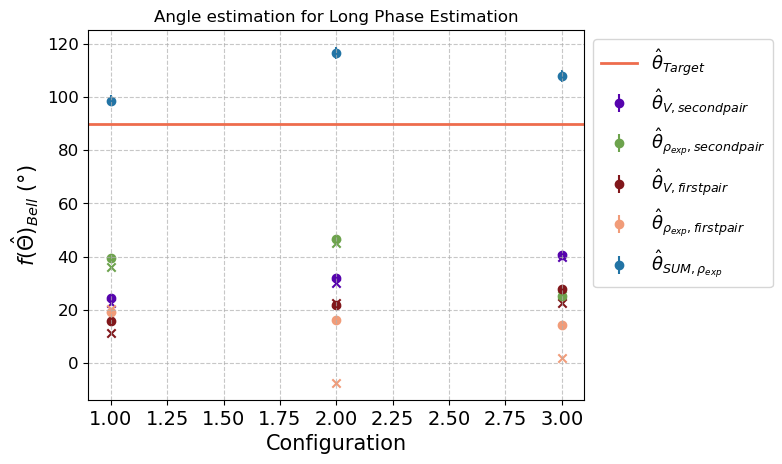

In [11]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

target_angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],
                 'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
                 'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.03116659378]}

target_sums = {"0": [(target_angles['RUN_1'][0])*180/np.pi,
                        (target_angles['RUN_2'][0])*180/np.pi,
                        (target_angles['RUN_3'][0])*180/np.pi],
                "1": [(target_angles['RUN_1'][1])*180/np.pi,
                        (target_angles['RUN_2'][1])*180/np.pi,
                        (target_angles['RUN_3'][1])*180/np.pi],
                "2": [(target_angles['RUN_1'][2])*180/np.pi,
                        (target_angles['RUN_2'][2])*180/np.pi,
                        (target_angles['RUN_3'][2])*180/np.pi],
                "3": [(target_angles['RUN_1'][3])*180/np.pi,
                        (target_angles['RUN_2'][3])*180/np.pi,
                        (target_angles['RUN_3'][3])*180/np.pi]}

plt.figure(figsize=(6.4, 4.8))
plt.errorbar(x_data, (thetas_mle_plus[0]["v"]["sum"]["values"])*180/np.pi,np.sqrt(thetas_mle_plus[0]["v"]["sum"]["variance"])*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{V,second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_plus[1]["v"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_plus[1]["v"]["sum"]["variance"])*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{\rho_{exp},second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_plus[2]["v"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_plus[2]["v"]["sum"]["variance"])*180/np.pi, color=colors[3], label = r"$\hat{\theta}_{V,first pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_plus[3]["v"]["sum"]["values"]*180/np.pi,np.sqrt(thetas_mle_plus[3]["v"]["sum"]["variance"])*180/np.pi, color=colors[4], label = r"$\hat{\theta}_{\rho_{exp},first pair}$", marker = 'o', linestyle = "",zorder=1)

plt.errorbar(x_data, (thetas_mle_plus[0]["v"]["sum"]["values"]+thetas_mle_plus[1]["v"]["sum"]["values"]+thetas_mle_plus[2]["v"]["sum"]["values"]+thetas_mle_plus[3]["v"]["sum"]["values"])*180/np.pi,(np.sqrt(thetas_mle_plus[1]["v"]["sum"]["variance"]+thetas_mle_plus[0]["v"]["sum"]["variance"]+thetas_mle_plus[2]["v"]["sum"]["variance"]+thetas_mle_plus[3]["v"]["sum"]["variance"]))*180/np.pi, color=colors[5], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
for i in range((len(target_sums))):
    plt.scatter(x_data,target_sums[str(i)],marker='x',color = colors[i+1],zorder=0)


plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta})_{Bell}$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.legend(fontsize=13, markerscale=1.,loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\long_QPE_no_Certification\Angle_Long_Phase_Estimation_visibility", bbox_inches='tight')
plt.show()

ValueError: 'x' and 'y' must have the same size

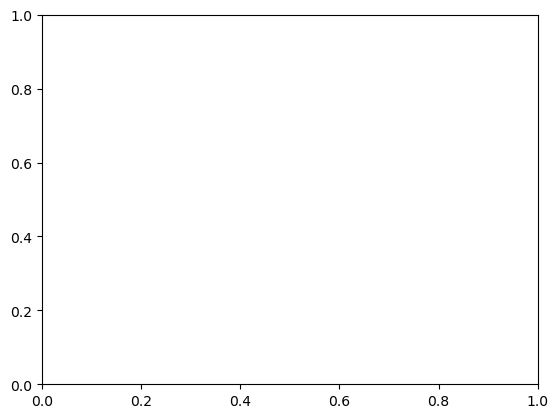

In [39]:
plt.errorbar(x_data, (thetas_mle_plus[0]["v"]["sum"]["values"]+thetas_mle_plus[1]["v"]["sum"]["values"]+thetas_mle_plus[2]["v"]["sum"]["values"]+thetas_mle_plus[3]["v"]["sum"]["values"])*180/np.pi,(np.sqrt(thetas_mle_plus[1]["v"]["sum"]["variance"]+thetas_mle_plus[0]["v"]["sum"]["variance"]+thetas_mle_plus[2]["v"]["sum"]["variance"]+thetas_mle_plus[3]["v"]["sum"]["variance"]))*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{SUM,V}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, (thetas_mle_plus[0]["dm"]["sum"]["values"]+thetas_mle_plus[1]["dm"]["sum"]["values"]+thetas_mle_plus[2]["dm"]["sum"]["values"]+thetas_mle_plus[3]["dm"]["sum"]["values"])*180/np.pi,(np.sqrt(thetas_mle_plus[1]["dm"]["sum"]["variance"]+thetas_mle_plus[0]["dm"]["sum"]["variance"]+thetas_mle_plus[2]["dm"]["sum"]["variance"]+thetas_mle_plus[3]["dm"]["sum"]["variance"]))*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)


plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta}_{Plus})$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.legend(fontsize=13, markerscale=1.)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(40,140)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\long_QPE_no_Certification\Angle_Long_Phase_Estimation_Plus.pdf")
plt.show()

In [40]:
np.sqrt(thetas_mle_plus[1]["v"]["sum"]["variance"]+thetas_mle_plus[0]["v"]["sum"]["variance"]+thetas_mle_plus[2]["v"]["sum"]["variance"]+thetas_mle_plus[3]["v"]["sum"]["variance"])*180/np.pi

array([3.61349886, 3.6159575 , 3.56752936])

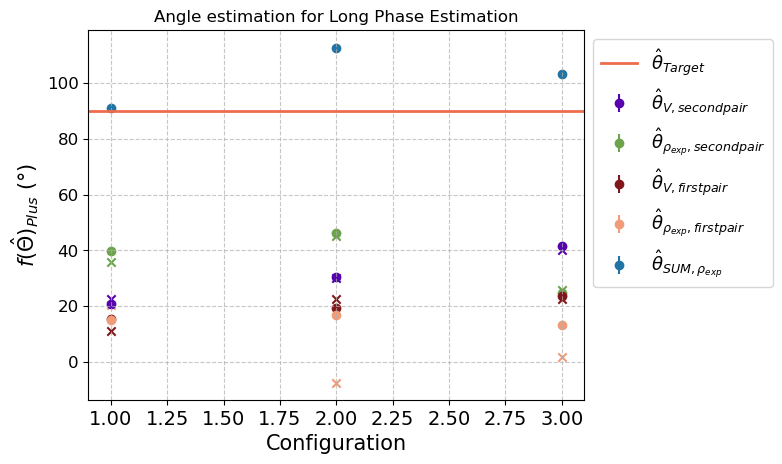

In [93]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

target_angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],
                 'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
                 'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.03116659378]}

target_sums = {"0": [(target_angles['RUN_1'][0])*180/np.pi,
                        (target_angles['RUN_2'][0])*180/np.pi,
                        (target_angles['RUN_3'][0])*180/np.pi],
                "1": [(target_angles['RUN_1'][1])*180/np.pi,
                        (target_angles['RUN_2'][1])*180/np.pi,
                        (target_angles['RUN_3'][1])*180/np.pi],
                "2": [(target_angles['RUN_1'][2])*180/np.pi,
                        (target_angles['RUN_2'][2])*180/np.pi,
                        (target_angles['RUN_3'][2])*180/np.pi],
                "3": [(target_angles['RUN_1'][3])*180/np.pi,
                        (target_angles['RUN_2'][3])*180/np.pi,
                        (target_angles['RUN_3'][3])*180/np.pi]}

plt.figure(figsize=(6.4, 4.8))
plt.errorbar(x_data, thetas_mle_plus[0]["dm"]["sum"]["values"]*180/np.pi,thetas_mle_plus[0]["dm"]["sum"]["variance"]*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{V,second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_plus[1]["dm"]["sum"]["values"]*180/np.pi,thetas_mle_plus[1]["dm"]["sum"]["variance"]*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{\rho_{exp},second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_plus[2]["dm"]["sum"]["values"]*180/np.pi,thetas_mle_plus[2]["dm"]["sum"]["variance"]*180/np.pi, color=colors[3], label = r"$\hat{\theta}_{V,first pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle_plus[3]["dm"]["sum"]["values"]*180/np.pi,thetas_mle_plus[3]["dm"]["sum"]["variance"]*180/np.pi, color=colors[4], label = r"$\hat{\theta}_{\rho_{exp},first pair}$", marker = 'o', linestyle = "",zorder=1)

plt.errorbar(x_data, (thetas_mle_plus[0]["dm"]["sum"]["values"]+thetas_mle_plus[1]["dm"]["sum"]["values"]+thetas_mle_plus[2]["dm"]["sum"]["values"]+thetas_mle_plus[3]["dm"]["sum"]["values"])*180/np.pi,(thetas_mle_plus[1]["dm"]["sum"]["variance"]+thetas_mle_plus[0]["dm"]["sum"]["variance"]+thetas_mle_plus[2]["dm"]["sum"]["variance"]+thetas_mle_plus[3]["dm"]["sum"]["variance"])*180/np.pi, color=colors[5], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
for i in range((len(target_sums))):
    plt.scatter(x_data,target_sums[str(i)],marker='x',color = colors[i+1],zorder=0)


plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta})_{Plus}$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.legend(fontsize=13, markerscale=1.,loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\long_QPE_no_Certification\Angle_Long_Phase_Estimatio_dm", bbox_inches='tight')
plt.show()

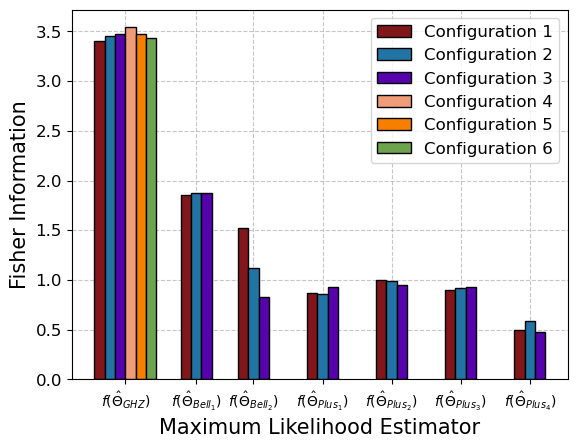

In [106]:
"""
PLOTTING THE FISHER INFORMATION FOR THE EACH OF THE a_vectors DEFINED ABOVE
"""

bar_width=0.15
data = [
    thetas_mle["dm"]["sum"]["fisher_info"],
    thetas_mle_bell1[0]["dm"]["sum"]["fisher_info"],
    thetas_mle_bell1[1]["dm"]["sum"]["fisher_info"],
    thetas_mle_plus[0]["dm"]["sum"]["fisher_info"],
    thetas_mle_plus[1]["dm"]["sum"]["fisher_info"],
    thetas_mle_plus[2]["dm"]["sum"]["fisher_info"],
    thetas_mle_plus[3]["dm"]["sum"]["fisher_info"]
    ]

labels = ["Configuration 1", "Configuration 2", "Configuration 3", "Configuration 4", "Configuration 5", "Configuration 6"]
colors = ["#81171B", "#2274A5", "#5603AD", "#F19C79", "#F77F00", "#6DA34D"]
fig, ax = plt.subplots(figsize=(6.4, 4.8))

      # Assuming all datasets have the same number of x-axis groups
num_groups = len(data)
x = np.arange(num_groups)
for i in range(num_groups):
    data_sets = len(data[i])
    # X-axis positions for the first dataset
    if i == 0 :
        for z in range(data_sets):
            ax.bar(x[i] + z * bar_width, data[i][z], width=bar_width, label=labels[z], color=colors[z], edgecolor='black')
            
    if i == 1 :
        for z in range(data_sets):
            ax.bar(x[i]+0.25 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')

    if i == 2 :
        for z in range(data_sets):
            ax.bar(x[i]+0.08 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')
    if i >2:
        for z in range(data_sets):
            ax.bar(x[i]+0.08 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')

ax.set_xticks(np.array([0.375, 1.4, 2.23,3.23,4.23,5.23,6.23]))
ax.set_xlabel("Maximum Likelihood Estimator", fontsize = 15)
ax.set_ylabel("Fisher Information", fontsize = 15)
# ax.set_title("Histogram with Multiple Data Sets")
ax.legend(fontsize=12)
ax.set_xticklabels([r'$f(\hat{\Theta}_{GHZ})$',r'$f(\hat{\Theta}_{Bell_1})$',r'$f(\hat{\Theta}_{Bell_2})$',r'$f(\hat{\Theta}_{Plus_1})$',r'$f(\hat{\Theta}_{Plus_2})$',r'$f(\hat{\Theta}_{Plus_3})$',r'$f(\hat{\Theta}_{Plus_4})$'], fontsize=10)
ax.tick_params(axis='y', labelsize=12)
ax.set_axisbelow(True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\Long_QPE_no_Certification\Fisher_Information.pdf", bbox_inches='tight')
plt.show()

# Example data for 6 datasets, each having values for 5 groups




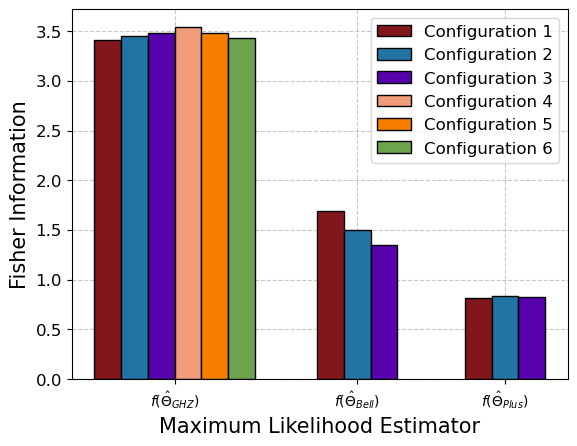

In [112]:
"""
PLOTTING THE FISHER INFORMATION FOR THE EACH OF THE a_vectors DEFINED ABOVE
"""

bar_width=0.15
data = [
    thetas_mle["dm"]["sum"]["fisher_info"],
    (thetas_mle_bell1[0]["dm"]["sum"]["fisher_info"]+thetas_mle_bell1[1]["dm"]["sum"]["fisher_info"])/2,
    (thetas_mle_plus[0]["dm"]["sum"]["fisher_info"]+thetas_mle_plus[1]["dm"]["sum"]["fisher_info"]+thetas_mle_plus[2]["dm"]["sum"]["fisher_info"]+thetas_mle_plus[3]["dm"]["sum"]["fisher_info"])/4,
    ]

labels = ["Configuration 1", "Configuration 2", "Configuration 3", "Configuration 4", "Configuration 5", "Configuration 6"]
colors = ["#81171B", "#2274A5", "#5603AD", "#F19C79", "#F77F00", "#6DA34D"]
fig, ax = plt.subplots(figsize=(6.4, 4.8))

      # Assuming all datasets have the same number of x-axis groups
num_groups = len(data)
x = np.arange(num_groups)
for i in range(num_groups):
    data_sets = len(data[i])
    # X-axis positions for the first dataset
    if i == 0 :
        for z in range(data_sets):
            ax.bar(x[i] + z * bar_width, data[i][z], width=bar_width, label=labels[z], color=colors[z], edgecolor='black')
            
    if i == 1 :
        for z in range(data_sets):
            ax.bar(x[i]+0.25 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')

    if i == 2 :
        for z in range(data_sets):
            ax.bar(x[i]+0.08 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')
    if i >2:
        for z in range(data_sets):
            ax.bar(x[i]+0.08 + z * bar_width, data[i][z], width=bar_width, color=colors[z], edgecolor='black')

ax.set_xticks(np.array([0.375, 1.4, 2.23]))
ax.set_xlabel("Maximum Likelihood Estimator", fontsize = 15)
ax.set_ylabel("Fisher Information", fontsize = 15)
# ax.set_title("Histogram with Multiple Data Sets")
ax.legend(fontsize=12)
ax.set_xticklabels([r'$f(\hat{\Theta}_{GHZ})$',r'$f(\hat{\Theta}_{Bell})$',r'$f(\hat{\Theta}_{Plus})$'], fontsize=10)
ax.tick_params(axis='y', labelsize=12)
ax.set_axisbelow(True)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\Long_QPE_no_Certification\Fisher_Information_Long.pdf", bbox_inches='tight')
plt.show()

# Example data for 6 datasets, each having values for 5 groups




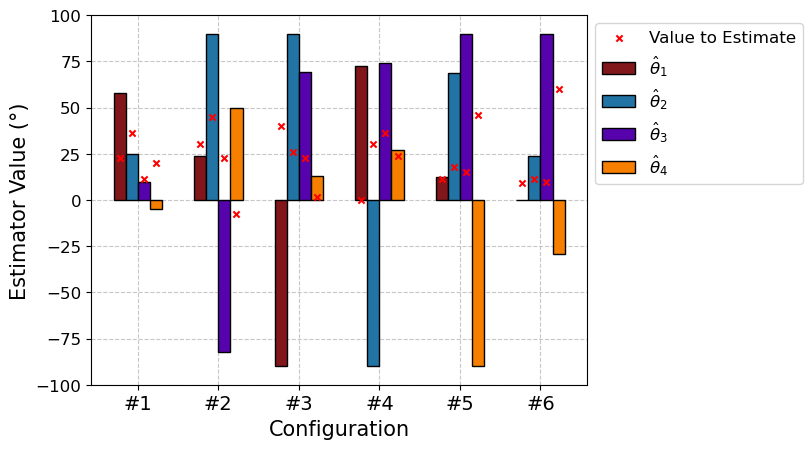

In [56]:
import matplotlib.pyplot as plt
import numpy as np

os.chdir(r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\Long_QPE_no_Certification')
folder = [i for i in glob.glob(r"Run*")]

Angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
          'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.031166593785612928],'RUN_4' : [0,np.pi/6,np.pi/5,0.41887902047863923],
          'RUN_5' : [np.pi/16,np.pi/10,np.pi/12,0.7984881327874058],'RUN_6' : [np.pi/20,np.pi/16,np.pi/19,1.052020171498161]}

def plot_histogram(data, labels, colors, bar_width=0.15, ylim=None):
    num_groups = len(data[0])  # Assuming all datasets have the same number of x-axis groups
    num_datasets = len(data)
    x = np.arange(num_groups)  # X-axis positions for the first dataset
    
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    
    for i in range(num_datasets):
        ax.bar(x + i * bar_width, data[i], width=bar_width, label=labels[i], color=colors[i], edgecolor='black')

    
    legend_added = False  # Variable pour éviter de répéter la légende

    for i in range(num_groups):
            for w in range(num_datasets):
                x_point = x[i] + w * bar_width
                y_point = Angles[str(folder[i])][w] * 180 / np.pi

                if not legend_added:  # Ajouter la légende une seule fois
                    ax.scatter(x_point, y_point, color='red', s=20, marker="x", label='Value to Estimate')
                    legend_added = True
                else:
                    ax.scatter(x_point, y_point, color='red', s=20, marker="x")
            

    ax.set_xticks(x + (num_datasets - 1) * bar_width / 2)
    ax.set_xticklabels(['#1', '#2', '#3', '#4', '#5', '#6'], fontsize=14)
    ax.tick_params(axis='y', labelsize=12)

    ax.set_xlabel("Configuration", fontsize = 15)
    ax.set_ylabel("Estimator Value (°)", fontsize = 15)

    # ax.set_title("Histogram with Multiple Data Sets")
    ax.legend(fontsize=12, bbox_to_anchor=(1, 1))

    
    if ylim:
        ax.set_ylim(-100, ylim)
        
    ax.set_axisbelow(True)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\Long_QPE_no_Certification\Estimator_Value_GHZ.pdf", bbox_inches='tight')
    plt.show()

# Example data for 6 datasets, each having values for 5 groups
data = [
    thetas_mle["dm"]["indiv"]["values"][0]*180/np.pi,
    thetas_mle["dm"]["indiv"]["values"][1]*180/np.pi,
    thetas_mle["dm"]["indiv"]["values"][2]*180/np.pi,
    thetas_mle["dm"]["indiv"]["values"][3]*180/np.pi
]

# data=np.transpose(data)
labels = [r"$\hat{\theta}_1$", r"$\hat{\theta}_2$", r"$\hat{\theta}_3$", r"$\hat{\theta}_4$"]
colors = ["#81171B", "#2274A5", "#5603AD", "#F77F00", "#6DA34D"]

plot_histogram(data, labels, colors, ylim=100)

In [57]:
ratio_GHZ = []
for i in range(len(data[0])) : 
    for w in range(len(Angles[str(folder[i])])):
        ratio_GHZ.append(np.abs(Angles[str(folder[i])][w]*180/np.pi-thetas_mle["dm"]["indiv"]["values"][w][i]*180/np.pi)/180)

In [59]:
np.log10(100*np.array(ratio_GHZ))

array([ 1.29410731,  0.80014711, -0.0550721 ,  1.14187979,  0.53390352,
        1.39794001,  1.7642149 ,  1.50327876,  1.85867085,  1.55284197,
        1.41392714,  0.80127863,  1.60551086,  1.82390874,  1.32619333,
        0.22322028, -0.25014143,  1.45096079,  1.61978876,  1.87746733,
        0.70961225,  0.84715985,  1.65066532,  1.69681267])

In [63]:
np.log10(0.0001)

-4.0

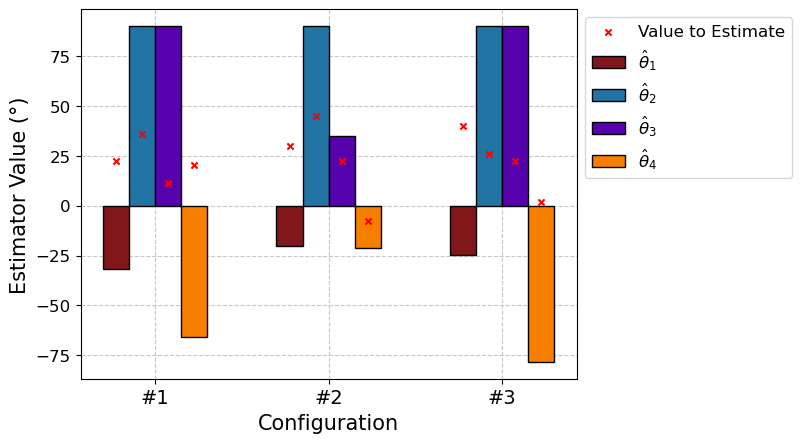

In [70]:
import matplotlib.pyplot as plt
import numpy as np

os.chdir(r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\Long_QPE_no_Certification')
folder = [i for i in glob.glob(r"Run*")]

Angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
          'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.031166593785612928],'RUN_4' : [0,np.pi/6,np.pi/5,0.41887902047863923],
          'RUN_5' : [np.pi/16,np.pi/10,np.pi/12,0.7984881327874058],'RUN_6' : [np.pi/20,np.pi/16,np.pi/19,1.052020171498161]}

def plot_histogram(data, labels, colors, bar_width=0.15, ylim=None):
    num_groups = len(data[0])  # Assuming all datasets have the same number of x-axis groups
    num_datasets = len(data)
    x = np.arange(num_groups)  # X-axis positions for the first dataset
    
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    
    for i in range(num_datasets):
        ax.bar(x + i * bar_width, data[i], width=bar_width, label=labels[i], color=colors[i], edgecolor='black')

    
    legend_added = False  # Variable pour éviter de répéter la légende

    for i in range(num_groups):
            for w in range(num_datasets):
                x_point = x[i] + w * bar_width
                y_point = Angles[str(folder[i])][w] * 180 / np.pi

                if not legend_added:  # Ajouter la légende une seule fois
                    ax.scatter(x_point, y_point, color='red', s=20, marker="x", label='Value to Estimate')
                    legend_added = True
                else:
                    ax.scatter(x_point, y_point, color='red', s=20, marker="x")
            

    ax.set_xticks(x + (num_datasets - 1) * bar_width / 2)
    ax.set_xticklabels(['#1', '#2', '#3'], fontsize=14)
    ax.tick_params(axis='y', labelsize=12)

    ax.set_xlabel("Configuration", fontsize = 15)
    ax.set_ylabel("Estimator Value (°)", fontsize = 15)

    # ax.set_title("Histogram with Multiple Data Sets")
    ax.legend(fontsize=12, bbox_to_anchor=(1, 1))


    ax.set_axisbelow(True)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Bell\Long_QPE_no_Certification\Estimator_Value_Bell.pdf", bbox_inches='tight')
    plt.show()

# Example data for 6 datasets, each having values for 5 groups
data = [
    (thetas_mle_bell1[0]["dm"]["indiv"]["values"][0])*180/np.pi,
    (thetas_mle_bell1[0]["dm"]["indiv"]["values"][1])*180/np.pi,
    (thetas_mle_bell1[1]["dm"]["indiv"]["values"][0])*180/np.pi,
    (thetas_mle_bell1[1]["dm"]["indiv"]["values"][1])*180/np.pi,
]

# data=np.transpose(data)
labels = [r"$\hat{\theta}_1$", r"$\hat{\theta}_2$", r"$\hat{\theta}_3$", r"$\hat{\theta}_4$"]
colors = ["#81171B", "#2274A5", "#5603AD", "#F77F00", "#6DA34D"]

plot_histogram(data, labels, colors, ylim=150)

In [71]:
ratio_Bell = []
for i in range(len(data[0])) : 
      for w in range(len(Angles[str(folder[i])])):
            ratio_Bell.append(np.abs(Angles[str(folder[i])][w]*180/np.pi-thetas_mle_bell1[np.round((w+1)/4)]["dm"]["indiv"]["values"][(w)%2][i]*180/np.pi)/180)

In [74]:
np.log10(100*np.array(ratio_Bell))

array([1.48073615, 1.47712125, 1.64097806, 1.67964902, 1.44509663,
       1.39794001, 0.83550841, 0.88536978, 1.55559702, 1.55284197,
       1.57403127, 1.64831449])

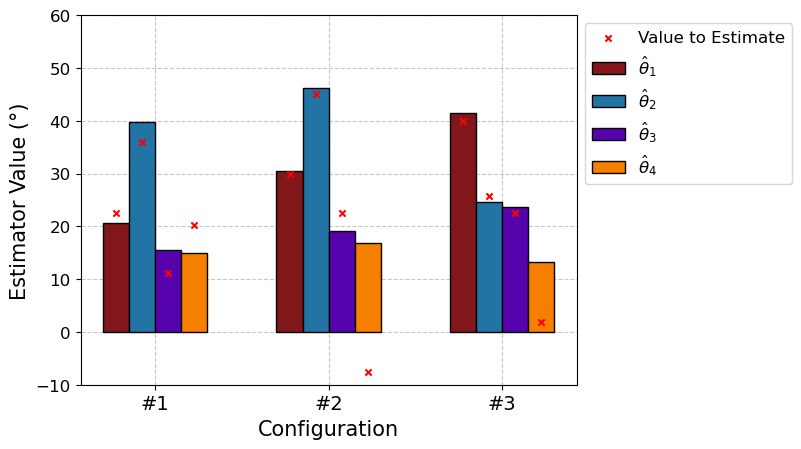

In [41]:
import matplotlib.pyplot as plt
import numpy as np

os.chdir(r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\QST\Long_QPE_no_Certification')
folder = [i for i in glob.glob(r"Run*")]



Angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
          'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.031166593785612928],'RUN_4' : [0,np.pi/6,np.pi/5,0.41887902047863923],
          'RUN_5' : [np.pi/16,np.pi/10,np.pi/12,0.7984881327874058],'RUN_6' : [np.pi/20,np.pi/16,np.pi/19,1.052020171498161]}

def plot_histogram(data, labels, colors, bar_width=0.15, ylim=None):
    num_groups = len(data[0])  # Assuming all datasets have the same number of x-axis groups
    num_datasets = len(data)
    x = np.arange(num_groups)  # X-axis positions for the first dataset
    
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    
    for i in range(num_datasets):
        ax.bar(x + i * bar_width, data[i], width=bar_width, label=labels[i], color=colors[i], edgecolor='black')

    
    legend_added = False  # Variable pour éviter de répéter la légende

    for i in range(num_groups):
            for w in range(num_datasets):
                x_point = x[i] + w * bar_width
                y_point = Angles[str(folder[i])][w] * 180 / np.pi

                if not legend_added:  # Ajouter la légende une seule fois
                    ax.scatter(x_point, y_point, color='red', s=20, marker="x", label='Value to Estimate')
                    legend_added = True
                else:
                    ax.scatter(x_point, y_point, color='red', s=20, marker="x")
            

    ax.set_xticks(x + (num_datasets - 1) * bar_width / 2)
    ax.set_xticklabels(['#1', '#2', '#3'], fontsize=14)
    ax.tick_params(axis='y', labelsize=12)

    ax.set_xlabel("Configuration", fontsize = 15)
    ax.set_ylabel("Estimator Value (°)", fontsize = 15)

    # ax.set_title("Histogram with Multiple Data Sets")
    ax.legend(fontsize=12, bbox_to_anchor=(1, 1))

    
    if ylim:
        ax.set_ylim(-10, ylim)

    ax.set_axisbelow(True)
    plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\Long_QPE_no_Certification\Estimator_Value_Plus.pdf")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Example data for 6 datasets, each having values for 5 groups
data = [
    thetas_mle_plus[0]["dm"]["sum"]["values"]*180/np.pi,
    thetas_mle_plus[1]["dm"]["sum"]["values"]*180/np.pi,
    thetas_mle_plus[2]["dm"]["sum"]["values"]*180/np.pi,
    thetas_mle_plus[3]["dm"]["sum"]["values"]*180/np.pi
]

# data=np.transpose(data)
labels = [r"$\hat{\theta}_1$", r"$\hat{\theta}_2$", r"$\hat{\theta}_3$", r"$\hat{\theta}_4$"]
colors = ["#81171B", "#2274A5", "#5603AD", "#F77F00", "#6DA34D"]

plot_histogram(data, labels, colors, ylim=60)

In [42]:
ratio_Plus = []
for i in range(len(data[0])) : 
      for w in range(len(Angles[str(folder[i])])):
            ratio_Plus.append(np.abs(Angles[str(folder[i])][w]*180/np.pi-thetas_mle_plus[w]["dm"]["sum"]["values"][i]*180/np.pi)/180)
            
np.log10(100*np.array(ratio_Plus))

array([ 6.28680177e-04,  3.23377621e-01,  3.79149563e-01,  4.66825240e-01,
       -6.35135514e-01, -1.93062156e-01,  2.66286166e-01,  1.13207545e+00,
       -7.66136761e-02, -2.18501620e-01, -2.13693669e-01,  8.05108139e-01])

In [108]:
np.log10(0.1)

-1.0

In [27]:
'''PRIVACY PLOT '''
import csv


def privacy(state,a_vector,fisher_info_matrix,fisher_info_matrix2=None,fisher_info_matrix3=None,fisher_info_matrix4=None):
    if state =='GHZ':
        return np.trace((np.identity(4)-((np.transpose(a_vector)*a_vector)/(np.linalg.norm(a_vector))**2))@fisher_info_matrix)/np.trace(fisher_info_matrix)

    if state == 'Bell':
        fisher_info_matrix_combine = np.block([[fisher_info_matrix,np.zeros((2, 2))],[np.zeros((2, 2)),fisher_info_matrix2]])
        return np.trace((np.identity(4)-((np.transpose(a_vector)*a_vector)/(np.linalg.norm(a_vector))**2))@fisher_info_matrix_combine)/(np.trace(fisher_info_matrix_combine))
    
    if state == 'Plus':
        fisher_info_matrix_combine = np.block([[fisher_info_matrix,np.zeros((1,1)),np.zeros((1, 1)),np.zeros((1,1))],
                                            [np.zeros((1,1)),fisher_info_matrix2,np.zeros((1, 1)),np.zeros((1,1))],
                                            [np.zeros((1,1)),np.zeros((1,1)),fisher_info_matrix3,np.zeros((1,1))],
                                            [np.zeros((1,1)),np.zeros((1,1)),np.zeros((1, 1)),fisher_info_matrix4]])
        return np.trace((np.identity(4)-((np.transpose(a_vector)*a_vector)/(np.linalg.norm(a_vector))**2))@fisher_info_matrix_combine)/(np.trace(fisher_info_matrix_combine))

    
epsilon_GHZ = []
epsilon_Bell = []
Fidelity_privacy_GHZ = []
Fidelity_privacy_Bell = []
epsilon_Plus = []

Fidelity_GHZ = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Verif\GHZ*")]
Fidelity_Bell = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Verif\Bell*")]

for files in Fidelity_GHZ:
    with open(files, 'r') as output:
        Fidelity_privacy_GHZ.append(1-sum(np.loadtxt(output, comments="#", delimiter=",", unpack=False))/30)

for files in Fidelity_Bell:
    with open(files, 'r') as output:
        Fidelity_privacy_Bell.append(1-(sum(np.loadtxt(output, comments="#", delimiter=",", unpack=False))/30))

for i in range(len(fisher_info_matrix_GHZ)):
    state = 'GHZ'
    a_vector = np.matrix([1, 1, 1, 1])
    epsilon_GHZ.append(privacy(state,a_vector,fisher_info_matrix_GHZ[i]))

for i in range((3)):
    state = 'Plus'
    a_vector = np.matrix([1, 1, 1, 1])
    epsilon_Plus.append(privacy(state,a_vector,fisher_info_matrix_plus[3*i],fisher_info_matrix_plus[3*i+1],fisher_info_matrix_plus[3*i+2],fisher_info_matrix_plus[3*i+3]))

for i in range((3)):
    state = 'Bell'
    a_vector = np.matrix([1, 1, 1, 1])
    epsilon_Bell.append(privacy(state,a_vector,fisher_info_matrix_bell[i*2],fisher_info_matrix_bell[(i*2)+1]))

x_vals = [1, 2, 3, 4, 5, 6]
x_vals2 = [1, 2, 3]
plt.figure(figsize=(8, 5))
plt.scatter(x_vals, epsilon_GHZ, marker='o', linestyle='-', color='blue',label = r"$\epsilon_{FI\_GHZ}$")
plt.scatter(x_vals2, epsilon_Bell, marker='o', linestyle='-', color='green',label=r'$\epsilon_{FI\_Bell}$')
plt.scatter(x_vals2, epsilon_Plus, marker='o', linestyle='-', color='black',label=r'$\epsilon_{FI\_Plus}$')
plt.xlabel('Configuration', fontsize=12)
plt.ylabel(r'$\epsilon$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(x_vals)
plt.tight_layout()
plt.yscale('log')
plt.legend()
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\GHZ\Long_QPE_no_Certification\Privacy_GHZ_Long.pdf", bbox_inches='tight')
plt.show()

NameError: name 'fisher_info_matrix_plus' is not defined